# Principal component analysis

- hide: true
- toc: true
- comments: true
- categories: [stats]

In [185]:
from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import statsmodels.api as sm

In [63]:
def make_data():
    """Fetch and prepare data used for examples."""
    fp = 's3://fgu-samples/transactions.parquet'
    cols = ['amount', 'user_id', 'year_of_birth', 'gender']
    
    df = pd.read_parquet(fp, columns=cols)
    df = df[df.gender.isin(['m', 'f'])]
    df['age'] = datetime.now().year - df.year_of_birth
    df['male'] = df.gender == 'm'
    df = df.rename(columns={'amount': 'spend'})
    g = df.groupby('user_id')
    df = g.agg({'spend': 'sum', 'age': 'first', 'male': 'first'})
    return df

df = make_data()
df.head(3)

,spend,age,male
user_id,,,
977,36665.800781,48.0,True
3277,17830.087891,34.0,False
4277,-24827.089844,62.0,True


###

### Basics

In [132]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
pca.fit(df)

PCA(n_components=1)

The fitted PCA's component attribute contains the loading vectors of each principal component, which, in turn, contain the loadings for each of the original features.

In [136]:
pca.components_

array([[ 1.00000000e+00,  1.30713265e-05, -5.78356798e-07]])

By definition, their squares have to sum to zero. Let's check:

In [156]:
np.sum(np.square(pca.components_))

1.0

Let's transform the data

In [168]:
df_pca = pca.transform(df)
df_pca[:5]

array([[ 21732.90091993],
       [  2897.18784849],
       [-39759.98951681],
       [ 72551.13144968],
       [-21768.62012473]])

We could have done this manually, like to:

In [170]:
((df - df.mean()) * pca.components_[0]).sum(1)[:5]

user_id
977     21732.900508
3277     2897.187436
4277   -39759.989929
5377    72551.131038
7077   -21768.620537
dtype: float64

### Dimensionality reduction

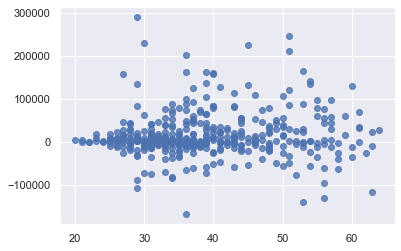

In [186]:
plt.scatter(data=df, x='age', y='spend', alpha=0.8);

In [202]:
pca = PCA(n_components=1)
df_pca = pca.fit_transform(df)
df_new = pca.inverse_transform(df_pca)

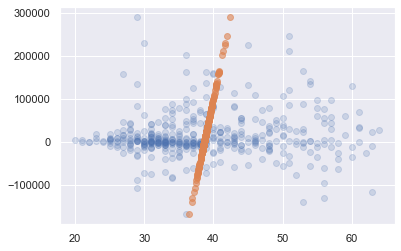

In [203]:
plt.scatter(data=df, x='age', y='spend', alpha=0.2);
plt.scatter(df_new[:, 1], df_new[:, 0], alpha=0.6);

# Sources

- [The hundred-page machine learning book](http://themlbook.com)
- [An introduction to statistical learning](https://www.statlearning.com)